# Импорт необходимых библиотек

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.plotting import plot_points, plot_model
from sklearn.svm import SVC  # Алгоритм Support Vector Classifier

# Построение SVM для разделения линейного набора данных

## Загрузка линейного набора данных

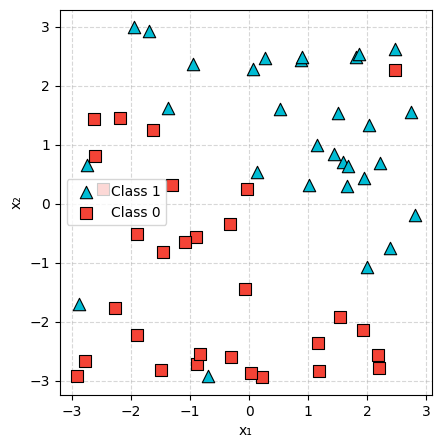

In [2]:
linear_data = pd.read_csv('data/linear.csv')  # Чтение CSV-файла с данными

features = np.array(linear_data[['x_1', 'x_2']])  # Извлечение признаков (фичей)
labels = np.array(linear_data['y'])  # Извлечение меток классов

plot_points(features, labels, figsize=(10, 5))  # Визуализация точек данных
plt.show()

## Создание и обучение SVM с линейным ядром

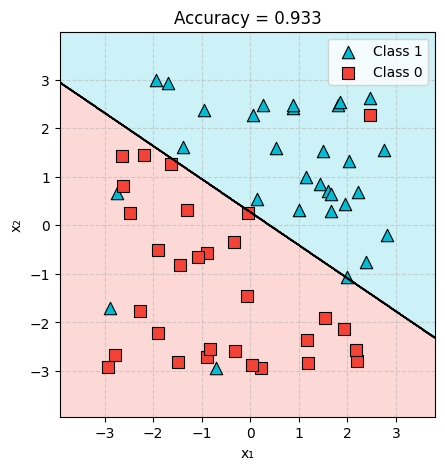

In [3]:
svm_linear = SVC(kernel='linear')  # Инициализация SVM с линейным ядром
svm_linear.fit(features, labels)  # Обучение модели на данных

acc = svm_linear.score(features, labels)  # Точность на обучающих данных

plot_model(features, labels, svm_linear, figsize=(10, 5))  # Визуализация модели
plt.title(f"Accuracy = {acc:.3f}")
plt.show()

## Эксперименты с параметром регуляризации C

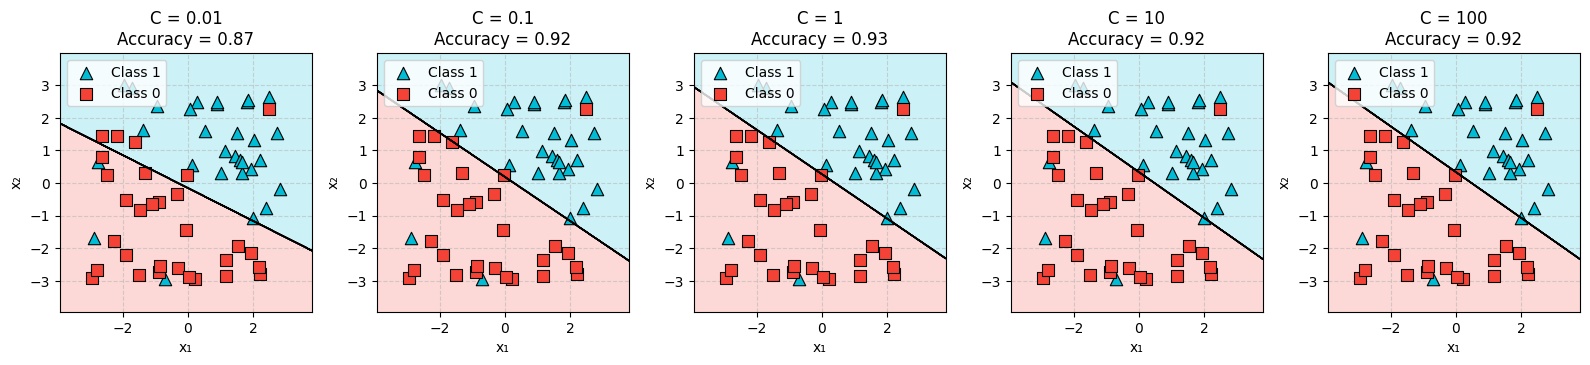

In [4]:
c_regularization = [0.01,  # SVM с малым C (допускает больше ошибок, слабая регуляризация)
                    0.1,
                    1, 
                    10,
                    100  # SVM с большим C (меньше допускает ошибки, сильная регуляризация)
]

fig, axes = plt.subplots(1, len(c_regularization), figsize=(16, 8))  # одна строка, несколько столбцов

for ax, C in zip(axes, c_regularization):
    svm_c = SVC(kernel='linear', C=C)
    svm_c.fit(features, labels)
    acc = svm_c.score(features, labels)

    ax.set_title(f"C = {C}\nAccuracy = {acc:.2f}")
    plot_model(features, labels, svm_c, figsize=fig, ax=ax)

plt.tight_layout()
plt.show()

# Построение полиномиальных ядер для кругового набора данных

## Загрузка данных one_circle

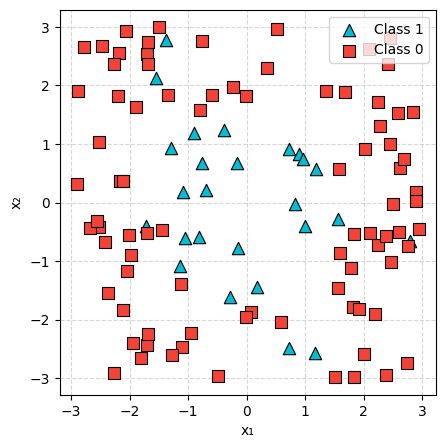

In [5]:
circular_data = pd.read_csv('data/one_circle.csv')

features = np.array(circular_data[['x_1', 'x_2']])
labels = np.array(circular_data['y'])

plot_points(features, labels, figsize=(10, 5))  # Визуализация круговых данных
plt.show()

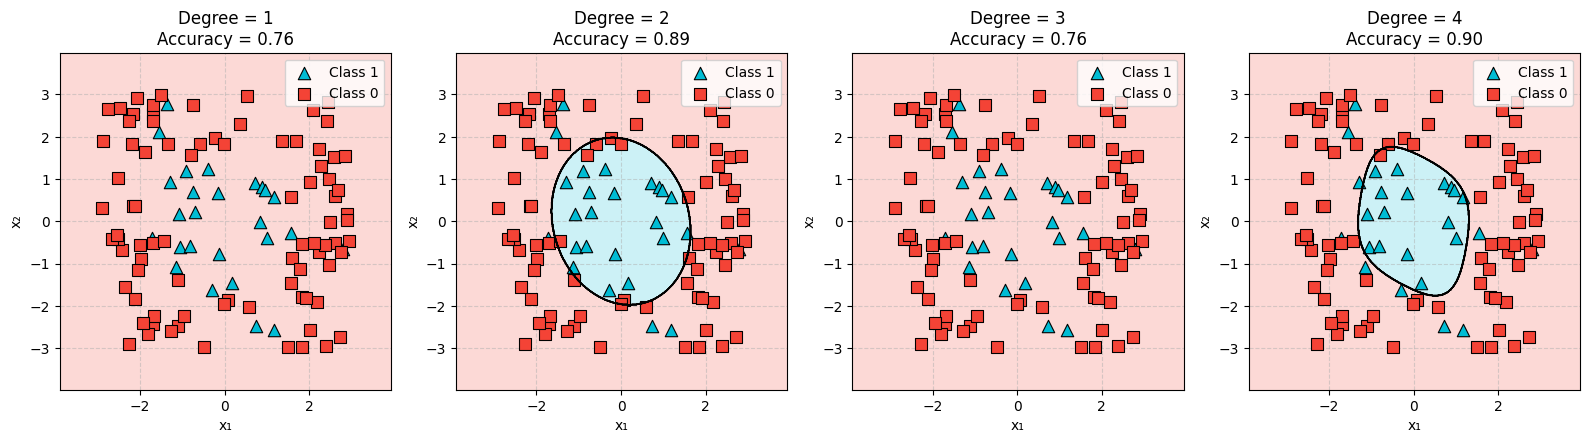

In [6]:
degrees = [1,  # Полиномиальное ядро 1-й степени
           2,
           3, 
           4,  # Полиномиальное ядро 4-й степени
]

fig, axes = plt.subplots(1, len(degrees), figsize=(16, 8))  # одна строка, несколько столбцов

for ax, degree in zip(axes, degrees):
    svm_degree = SVC(kernel='poly', degree=degree)
    svm_degree.fit(features, labels)
    acc = svm_degree.score(features, labels)

    ax.set_title(f"Degree = {degree}\nAccuracy = {acc:.2f}")
    plot_model(features, labels, svm_degree, figsize=fig, ax=ax)

plt.tight_layout()
plt.show()

# Эксперименты с параметром gamma в RBF-ядре

## Загрузка данных two_circles

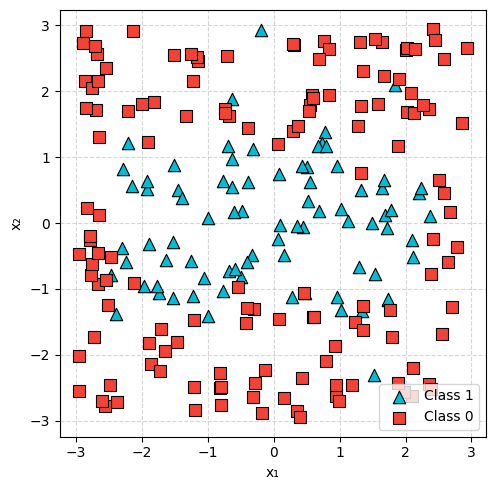

In [7]:
two_circles_data = pd.read_csv('data/two_circles.csv')

features = np.array(two_circles_data[['x_1', 'x_2']])
labels = np.array(two_circles_data['y'])

plot_points(features, labels, figsize=(10, 5))  # Визуализация двух кругов
plt.tight_layout()
plt.show()

## RBF-ядро с разными значениями gamma

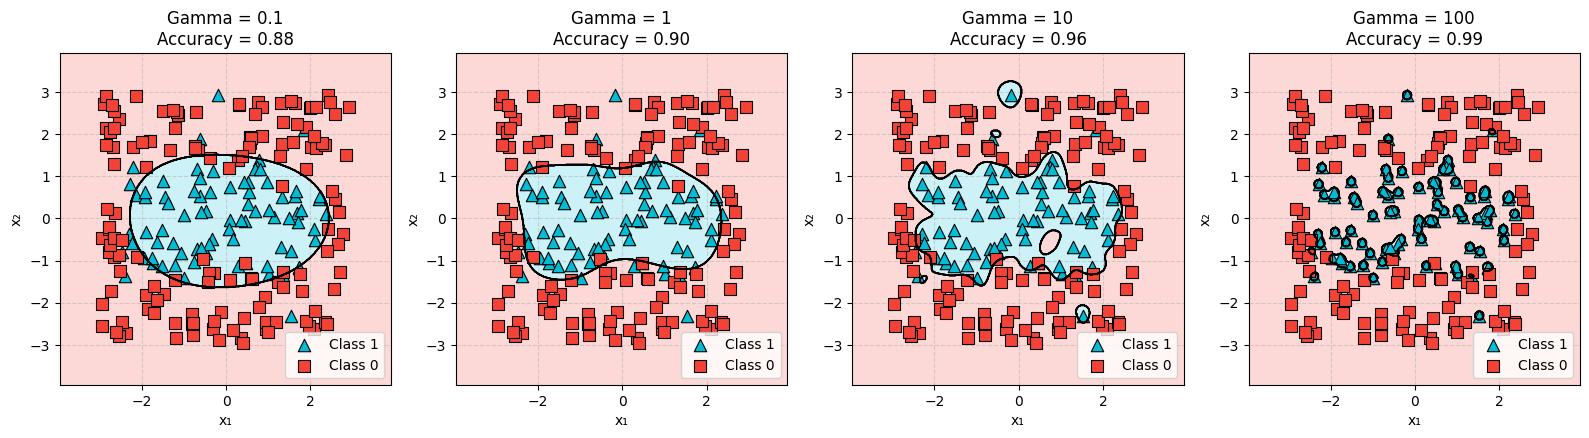

In [8]:
gammas = [0.1,  # (низкая чувствительность к отдельным точкам)
          1,  # (средняя чувствительность)
          10,  # (высокая чувствительность)
          100,  # (очень высокая чувствительность, возможен переобучение)
]

fig, axes = plt.subplots(1, len(degrees), figsize=(16, 8))  # одна строка, несколько столбцов

for ax, gamma in zip(axes, gammas):
    svm_gamma = SVC(kernel='rbf', gamma=gamma)  # Радиальная базисная функция
    svm_gamma.fit(features, labels)
    acc = svm_gamma.score(features, labels)

    ax.set_title(f"Gamma = {gamma}\nAccuracy = {acc:.2f}")
    plot_model(features, labels, svm_gamma, figsize=fig, ax=ax)

plt.tight_layout()
plt.show()

# Создание набора данных

In [9]:
# Создаём DataFrame с точками и метками классов
data = pd.DataFrame({
    'x_1' : [0, -1, 0, 0, 1, -1, 1],
    'x_2' : [0, 0, -1, 1, 0, 1, -1],
    'y' : [0, 0, 0, 1, 1, 1, 1]
})
display(data)

,x_1,x_2,y
0,0,0,0
1,-1,0,0
2,0,-1,0
3,0,1,1
4,1,0,1
5,-1,1,1
6,1,-1,1


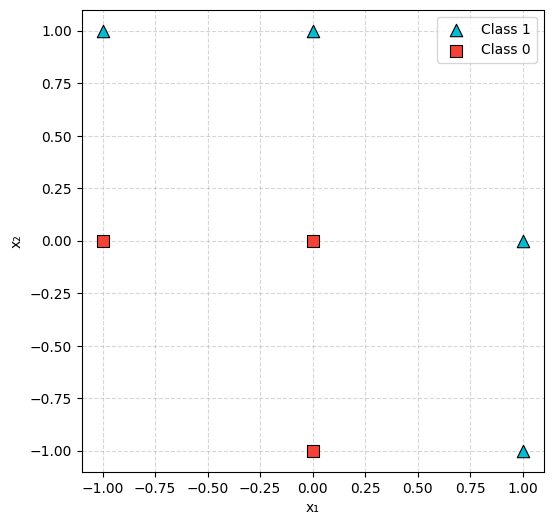

In [10]:
# Визуализация точек с помощью функции из utils
plot_points(data[['x_1','x_2']], data['y'])
plt.show()

# Вычисление матрицы подобий

In [11]:
def similarity(x, y):
    return np.exp(-(x[0] - y[0])**2 - (x[1] - y[1])**2)  # Гауссова функция схожести


X_features = data[['x_1', 'x_2']].values
y_labels = data['y'].values

n = len(X_features)
similarity_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        first = [X_features[i, 0], X_features[i, 1]]
        second = [X_features[j, 0], X_features[j, 1]]
        similarity_matrix[i, j] = similarity(first, second)

# Создаем DataFrame с подобиями
similarity_df = pd.DataFrame(
    similarity_matrix, 
    columns=[f'Sim{i+1}' for i in range(n)]
)

display(similarity_df)

,Sim1,Sim2,Sim3,Sim4,Sim5,Sim6,Sim7
0,1.000000,0.367879,0.367879,0.367879,0.367879,0.135335,0.135335
1,0.367879,1.000000,0.135335,0.135335,0.018316,0.367879,0.006738
2,0.367879,0.135335,1.000000,0.018316,0.135335,0.006738,0.367879
3,0.367879,0.135335,0.018316,1.000000,0.135335,0.367879,0.006738
4,0.367879,0.018316,0.135335,0.135335,1.000000,0.006738,0.367879
5,0.135335,0.367879,0.006738,0.367879,0.006738,1.000000,0.000335
6,0.135335,0.006738,0.367879,0.006738,0.367879,0.000335,1.000000


In [12]:
# Объединяем с исходными данными
result_df = pd.concat([data, similarity_df], axis=1)
display(result_df)

,x_1,x_2,y,Sim1,Sim2,Sim3,Sim4,Sim5,Sim6,Sim7
0,0,0,0,1.000000,0.367879,0.367879,0.367879,0.367879,0.135335,0.135335
1,-1,0,0,0.367879,1.000000,0.135335,0.135335,0.018316,0.367879,0.006738
2,0,-1,0,0.367879,0.135335,1.000000,0.018316,0.135335,0.006738,0.367879
3,0,1,1,0.367879,0.135335,0.018316,1.000000,0.135335,0.367879,0.006738
4,1,0,1,0.367879,0.018316,0.135335,0.135335,1.000000,0.006738,0.367879
5,-1,1,1,0.135335,0.367879,0.006738,0.367879,0.006738,1.000000,0.000335
6,1,-1,1,0.135335,0.006738,0.367879,0.006738,0.367879,0.000335,1.000000


# Обучение линейного SVM на матрице сходства

In [13]:
# Перед обучением удалим метку
result_df.drop(['y'], axis=1, inplace=True)

In [14]:
svm = SVC(kernel='linear', C=1.0)
svm.fit(result_df, y_labels)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [15]:
# Данные коэффициентов
coeffs = svm.coef_.tolist()[0]
features = result_df.columns.tolist()
bias = svm.intercept_.tolist()[0]

# Вывод таблицы
print(f"┌{'─'*10}┬{'─'*12}┐")
print(f"│ {'Признак':<8} │ {'Коэффициент':>10}│")
print(f"├{'─'*10}┼{'─'*12}┤")

for feat, coef in zip(features, coeffs):
    print(f"│ {feat:<8} │ {coef:>10.4f} │")
    
print(f"├{'─'*10}┼{'─'*12}┤")
print(f"│ {'Смещение':<8} │ {bias:>10.4f} │")
print(f"└{'─'*10}┴{'─'*12}┘")

┌──────────┬────────────┐
│ Признак  │ Коэффициент│
├──────────┼────────────┤
│ x_1      │     0.6748 │
│ x_2      │     0.6748 │
│ Sim1     │    -1.0972 │
│ Sim2     │    -0.6464 │
│ Sim3     │    -0.6471 │
│ Sim4     │     0.0154 │
│ Sim5     │     0.0160 │
│ Sim6     │     0.6777 │
│ Sim7     │     0.6777 │
├──────────┼────────────┤
│ Смещение │     0.5565 │
└──────────┴────────────┘


# Визуализация классификатора

In [16]:
class SimilaritySVM:
    def __init__(self, svm, X_train):
        self.svm = svm
        self.X_train = X_train  # только исходные координаты (n, 2)

    def _transform(self, X):
        """Преобразует X в вектор (x₁, x₂, Sim1, Sim2, ..., SimN)"""
        X = np.atleast_2d(X)
        sims = np.array([
            [similarity(x, train_point) for train_point in self.X_train]
            for x in X
        ])
        return np.hstack([X, sims])

    def predict(self, X):
        return self.svm.predict(self._transform(X))

C:\Users\novos\Desktop\GitHub\grokking-machine-learning\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


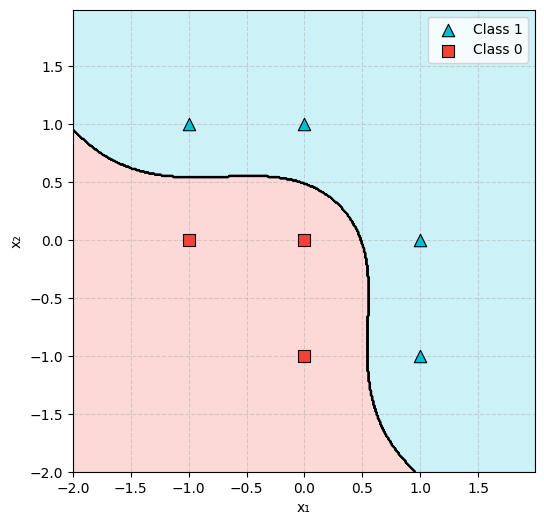

In [17]:
# Оборачиваем
svm_rbf_model = SimilaritySVM(svm, X_features)

plot_model(X_features, y_labels, svm_rbf_model)
plt.show()